<a href="https://colab.research.google.com/github/mvharsh/Deep-Learning/blob/main/RNN/RNN_Number_series_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Function to generate a number series based on user input
def generate_series(start, step, length):
    return np.arange(start, start + step * length, step)

# Function to prepare data for LSTM model
def prepare_data_for_lstm(series, n_steps):
    X, y = [], []
    for i in range(len(series) - n_steps):
        X.append(series[i:i + n_steps])
        y.append(series[i + n_steps])
    return np.array(X), np.array(y)

# Function to train the LSTM model and predict the next number in the series
def predict_next_number_lstm(series, n_steps):
    X, y = prepare_data_for_lstm(series, n_steps)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(n_steps, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=1000, batch_size=1, verbose=0)
    x_input = np.array([series[-n_steps:]])
    x_input = x_input.reshape((1, n_steps, 1))
    next_number = model.predict(x_input, verbose=0)[0][0]
    return next_number

# Get input from the user
start = float(input("Enter the start of the series: "))
step = float(input("Enter the step size of the series: "))
length = int(input("Enter the length of the series: "))

# Generate the series
series = generate_series(start, step, length)

# Define the number of time steps (length of input sequence for LSTM)
n_steps = 2 # Use the last 2 numbers for prediction

# Predict the next number in the series using LSTM
next_number = predict_next_number_lstm(series, n_steps)

# Calculate and print the accuracy
actual_next_number = series[-1] + step
mse = mean_squared_error([actual_next_number], [next_number])
accuracy = 100 * (1 - mse)

# Print the actual input series
print("Actual Input Series:")
print(series)

# Print only the predicted next number and accuracy
print("\nPredicted Next Number in the Series (LSTM):", next_number)
print("Prediction Accuracy (%):", accuracy)

Enter the start of the series: 2
Enter the step size of the series: 5
Enter the length of the series: 10
Actual Input Series:
[ 2.  7. 12. 17. 22. 27. 32. 37. 42. 47.]

Predicted Next Number in the Series (LSTM): 52.125916
Prediction Accuracy (%): 98.41452799737453


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = [[[(i+j)] for i in range(5)] for j in range(100)]
data = np.array(data, dtype = float)
target = [(i+5) for i in range(100)]
target = np.array(target, dtype = float)

In [ ]:
target.shape

(100,)

In [ ]:
data.shape

(100, 5, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=4)


In [ ]:
model = Sequential()
model.add(LSTM(1, batch_input_shape=(None, None, 1), return_sequences = True))
model.add(LSTM((1),return_sequences = False))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 1)           12        
                                                                 
 lstm_1 (LSTM)               (None, 1)                 12        
                                                                 
Total params: 24 (96.00 Byte)
Trainable params: 24 (96.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mean_absolute_error', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
solution = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))


Epoch 1/10
3/3 [==============================] - 18s 1s/step - loss: 56.6883 - accuracy: 0.0000e+00 - val_loss: 45.7490 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 74ms/step - loss: 56.6862 - accuracy: 0.0000e+00 - val_loss: 45.7470 - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 0s 98ms/step - loss: 56.6842 - accuracy: 0.0000e+00 - val_loss: 45.7449 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 64ms/step - loss: 56.6821 - accuracy: 0.0000e+00 - val_loss: 45.7428 - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 39ms/step - loss: 56.6800 - accuracy: 0.0000e+00 - val_loss: 45.7407 - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 0s 88ms/step - loss: 56.6779 - accuracy: 0.0000e+00 - val_loss: 45.7386 - val_accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 0s 80ms/step - loss: 56.6757 - accuracy: 0.0000e+00 - val

In [ ]:
y_pred = model.predict(x_test)

1/1 [==============================] - 4s 4s/step


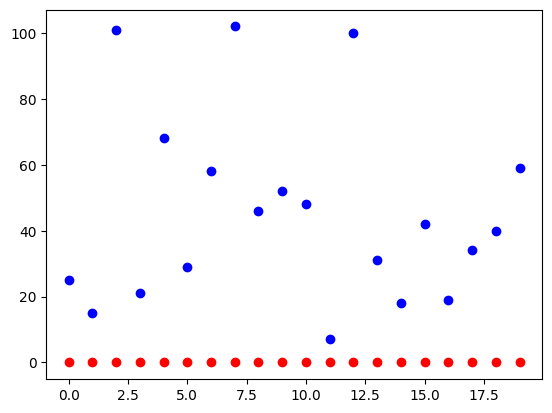

In [ ]:
plt.scatter(range(20),y_pred,color='r')
plt.scatter(range(20),y_test, color='b')
plt.show()

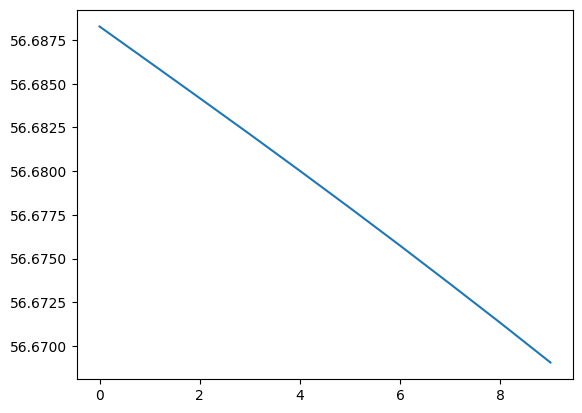

In [ ]:
plt.plot(solution.history['loss'])
plt.show()

In [ ]:
data=[[[(i+j)]for i in range(7)] for j in range(100)]
data = np.array(data, dtype = float)
target = [(i+7) for i in range(100)]
target = np.array(target, dtype = float)